In [9]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
predict = pd.read_csv('Input/predict.csv')
sample_submission = pd.read_csv('Input/sample_submission.csv')
train = pd.read_csv('Input/train.csv')

In [11]:
display(train.head())

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.12,Premium,H,SI1,61.6,59.0,6.67,6.63,4.10,5363
1,1,1.14,Very Good,E,SI2,60.0,54.0,6.74,6.97,4.11,5593
2,2,0.90,Very Good,D,SI2,60.3,63.0,6.12,6.22,3.72,3534
3,3,0.71,Ideal,E,VS1,61.9,54.0,5.74,5.76,3.56,3212
4,4,0.34,Very Good,F,SI2,60.0,62.0,4.51,4.55,2.72,447


In [12]:
print('shape', train.shape,'\n')
print(train.isna().sum(),'\n')
print(train.info(),'\n')
print(train.describe())

shape (40455, 11) 

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 3.4+ MB
None 

                 id         carat         depth         table             x  \
count  40455.000000  40455.000000  40455.000000  40455.000000  40455.00

In [13]:
#Finding outliers

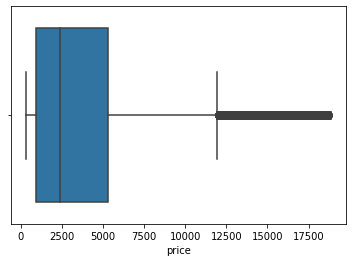

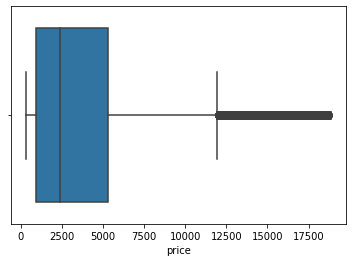

In [14]:
plt.show(sns.boxplot(x=train['price']))
plt.show(sns.boxplot(x=train['price']))

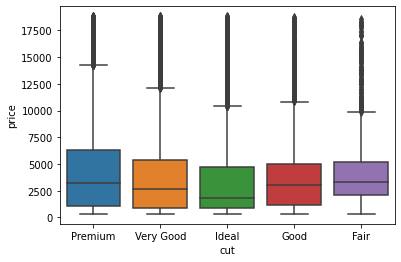

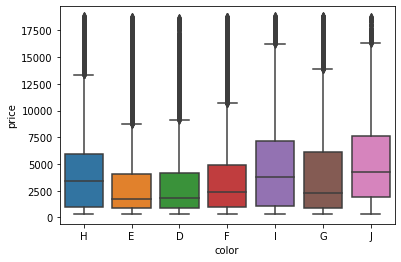

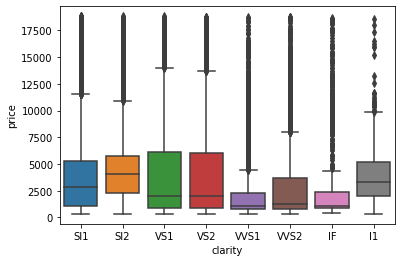

In [15]:
plt.show(sns.boxplot(x='cut', y="price", data=train))
plt.show(sns.boxplot(x='color', y="price", data=train))
plt.show(sns.boxplot(x='clarity', y="price", data=train))

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train["cut_le"] = le.fit_transform(train["cut"])
train["color_le"] = le.fit_transform(train["color"])
train["clarity_le"] = le.fit_transform(train["clarity"])

In [17]:
train_cl = train[['carat', 'cut_le', 'color_le', 'clarity_le','price']]

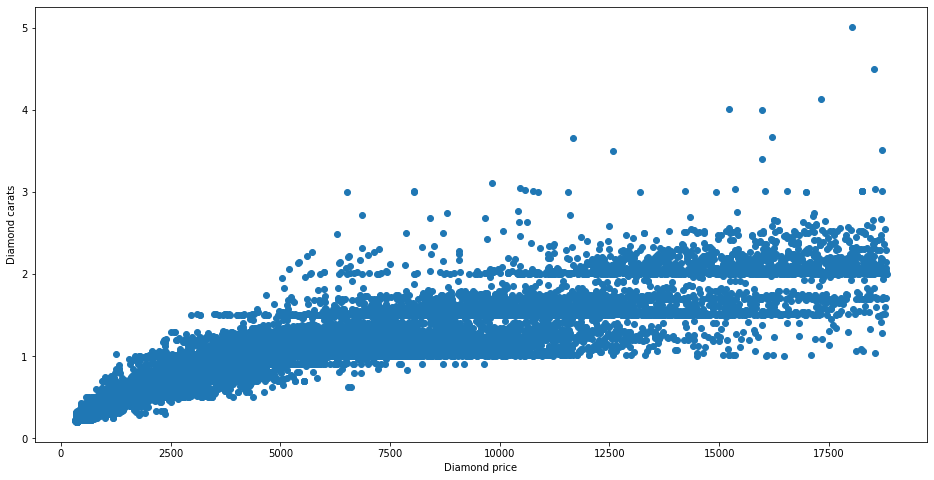

In [18]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train_cl['price'], train_cl['carat'])
ax.set_xlabel('Diamond price')
ax.set_ylabel('Diamond carats')
plt.show()

In [19]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(train_cl))
print(z)
threshold = 3
#print(np.where(z > 3))

[[0.67782057 0.43631756 0.8271011  1.06219822 0.35688533]
 [0.71993701 1.41173902 0.9377797  0.482915   0.41449197]
 [0.2145398  1.41173902 1.5260733  0.482915   0.10121263]
 ...
 [0.2145398  1.51452537 0.2388075  0.482915   0.16758549]
 [0.86734453 1.51452537 0.8271011  1.06219822 0.48963106]
 [0.81731285 0.53910391 0.8271011  1.25493464 0.70708414]]


In [20]:
train_cl = train_cl[(z < 3).all(axis=1)]

In [21]:
train_cl.shape

(39423, 5)

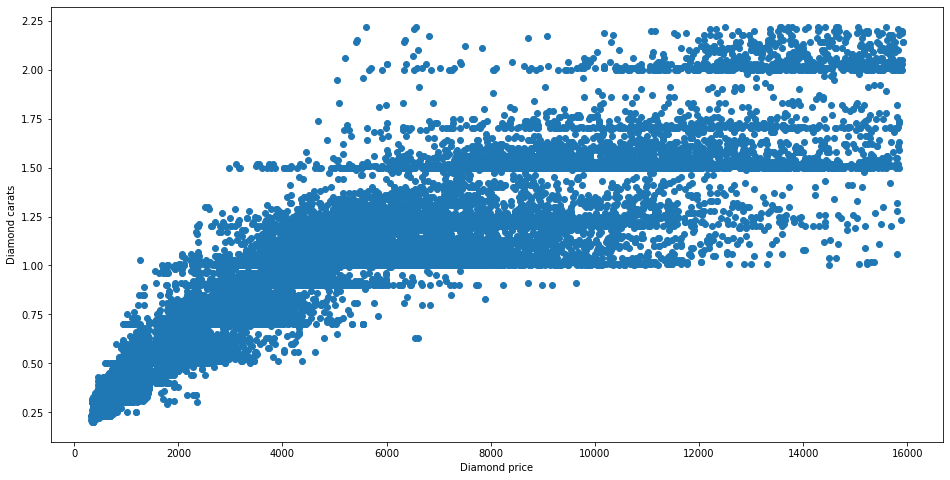

In [22]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train_cl['price'], train_cl['carat'])
ax.set_xlabel('Diamond price')
ax.set_ylabel('Diamond carats')
plt.show()

,carat,cut_le,color_le,clarity_le,price
count,39423.000000,39423.000000,39423.00000,39423.000000,39423.000000
mean,0.764407,2.550339,2.57020,3.846815,3604.924993
std,0.427776,1.025026,1.69408,1.730263,3450.264882
min,0.200000,0.000000,0.00000,0.000000,326.000000
25%,0.400000,2.000000,1.00000,2.000000,935.000000
50%,0.700000,2.000000,3.00000,4.000000,2320.000000
75%,1.020000,3.000000,4.00000,5.000000,5051.000000
max,2.220000,4.000000,6.00000,7.000000,15915.000000


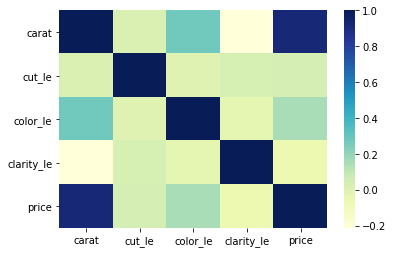

In [23]:
display(train_cl.describe())
plt.show(sns.heatmap(train_cl.corr(),cmap="YlGnBu"))

In [83]:
#Models
from sklearn.linear_model import OrthogonalMatchingPursuit, LinearRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
models = {
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "GradientBoostingRegressor" : GradientBoostingRegressor(random_state=0),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "LinearSVR" : LinearSVR(),
    "OrthogonalMatchingPursuit" : OrthogonalMatchingPursuit(),
    "LinearRegression" : LinearRegression(),
    "RandomForestRegressor" : RandomForestRegressor(),
    "ExtraTreesRegressor" : ExtraTreesRegressor()
}

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = train_cl.copy()
X.drop('price', axis=1, inplace = True)
y = train_cl['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [33]:
#nada
X = train_cl.copy()
X.drop('price', axis=1, inplace = True)
y = train_cl['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

for name, model in models.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
    print("He acabado :) ")
vale = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print (mean_squared_error(y_test, y_pred))
    vale.append(mean_squared_error(y_test, y_pred))
print(min(vale))

Entrenando DecisionTreeRegressor
He acabado :) 
Entrenando GradientBoostingRegressor
He acabado :) 
Entrenando KNeighborsRegressor
He acabado :) 
Entrenando LinearSVR
He acabado :) 
Entrenando OrthogonalMatchingPursuit
He acabado :) 
Entrenando LinearRegression
He acabado :) 
Entrenando RandomForestRegressor
He acabado :) 
Entrenando ExtraTreesRegressor
He acabado :) 
-------DecisionTreeRegressor-------
320329.6070975054
-------GradientBoostingRegressor-------
312536.3722061619
-------KNeighborsRegressor-------
389978.70317818644
-------LinearSVR-------
2959205.31663385
-------OrthogonalMatchingPursuit-------
1838287.3301923343
-------LinearRegression-------
1468573.4673559132
-------RandomForestRegressor-------
245716.03134180157
-------ExtraTreesRegressor-------
276288.3446325296
245716.03134180157


In [34]:
#Prelim
X = train_cl.copy()
X.drop('price', axis=1, inplace = True)
y = train_cl['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

for name, model in models.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
    print("He acabado :) ")
vale = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print (mean_squared_error(y_test, y_pred))
    vale.append(mean_squared_error(y_test, y_pred))


Entrenando DecisionTreeRegressor
He acabado :) 
Entrenando GradientBoostingRegressor
He acabado :) 
Entrenando KNeighborsRegressor
He acabado :) 
Entrenando LinearSVR
He acabado :) 
Entrenando OrthogonalMatchingPursuit
He acabado :) 
Entrenando LinearRegression
He acabado :) 
Entrenando RandomForestRegressor
He acabado :) 
Entrenando ExtraTreesRegressor
He acabado :) 
-------DecisionTreeRegressor-------
314221.38620392914
-------GradientBoostingRegressor-------
331445.84185594233
-------KNeighborsRegressor-------
376297.03080279013
-------LinearSVR-------
3015333.2305666357
-------OrthogonalMatchingPursuit-------
1848649.8976131447
-------LinearRegression-------
1475527.626038648
-------RandomForestRegressor-------
237345.22521791517
-------ExtraTreesRegressor-------
256251.0400301637


In [35]:
models_2 = {
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "GradientBoostingRegressor" : GradientBoostingRegressor(random_state=0),
    "ExtraTreesRegressor" : ExtraTreesRegressor(),
    "RandomForestRegressor" : RandomForestRegressor()
}

In [36]:
import numpy as np
from sklearn.model_selection import cross_val_score

#Nothing

values = []
X = train_cl.copy()
X.drop('price', axis=1, inplace = True)
y = train_cl['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
for name, model in models_2.items():
    scores = cross_val_score(model,X,y, cv=10, scoring='neg_mean_squared_error')

    print(f"{name} mean{np.mean(scores)}")
    values.append(np.mean(scores))
print('max',max(values))

DecisionTreeRegressor mean-305769.44940583245
GradientBoostingRegressor mean-330645.9225811219
ExtraTreesRegressor mean-271156.57986936974
RandomForestRegressor mean-248153.75347793862
max -248153.75347793862


In [37]:
#Normalizer
values = []
X = train_cl.copy()
X.drop('price', axis=1, inplace = True)
y = train_cl['price']
Normalizer(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
for name, model in models_2.items():
    scores = cross_val_score(model,X,y, cv=10, scoring='neg_mean_squared_error')

    print(f"{name} mean{np.mean(scores)}")
    values.append(np.mean(scores))
print('max',max(values))

DecisionTreeRegressor mean-303999.6098337804
GradientBoostingRegressor mean-330645.9225811219
ExtraTreesRegressor mean-270991.8518299151
RandomForestRegressor mean-248512.90616690996
max -248512.90616690996


In [38]:
#Standar Scaler
values = []
X = train_cl.copy()
X.drop('price', axis=1, inplace = True)
y = train_cl['price']
StandardScaler(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
for name, model in models_2.items():
    scores = cross_val_score(model,X,y, cv=10, scoring='neg_mean_squared_error')

    print(f"{name} mean{np.mean(scores)}")
    values.append(np.mean(scores))
print('max',max(values))

DecisionTreeRegressor mean-305453.32849926024
GradientBoostingRegressor mean-330645.9225811219
ExtraTreesRegressor mean-270916.2923143982
RandomForestRegressor mean-248011.33611686033
max -248011.33611686033


In [39]:
#NOrmalizer, Satndar Scaler
values = []
X = train_cl.copy()
X.drop('price', axis=1, inplace = True)
y = train_cl['price']
Normalizer(X)
StandardScaler(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
for name, model in models_2.items():
    scores = cross_val_score(model,X,y, cv=10, scoring='neg_mean_squared_error')

    print(f"{name} mean{np.mean(scores)}")
    values.append(np.mean(scores))
print('max',max(values))

DecisionTreeRegressor mean-304754.4414642365
GradientBoostingRegressor mean-330645.9225811219
ExtraTreesRegressor mean-270933.1675592023
RandomForestRegressor mean-248288.09621216962
max -248288.09621216962


In [67]:
le = preprocessing.LabelEncoder()
predict["cut_le"] = le.fit_transform(predict["cut"])
predict["color_le"] = le.fit_transform(predict["color"])
predict["clarity_le"] = le.fit_transform(predict["clarity"])
prd = predict[['carat','cut_le','color_le','clarity_le']]

In [90]:
X = train_cl.copy()
X.drop('price', axis=1, inplace = True)
y = train_cl['price']
Normalizer(X)
StandardScaler(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.000000000000001)
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print (mean_squared_error(y_test, y_pred))

print(r2_score(y_test,y_pred))

217261.11353649944
nan


In [91]:
result = pd.DataFrame({
    "y_pred":y_pred,
    "gt":y_test
})
result

,y_pred,gt
21360,3942.887231,4409


In [92]:
y_pred = model.predict(prd)

In [93]:
y_pred

array([ 737.55383333, 6028.84922222, 5808.43019841, ..., 2442.81612193,
       1311.89580801, 1060.86466667])

In [94]:
len(y_pred)

13485

In [95]:
result = pd.DataFrame({
    "price":y_pred,
})
result.reset_index(inplace=True)

In [96]:
result.rename(columns={'index': 'id'}, inplace=True)

In [97]:
result

,id,price
0,0,737.553833
1,1,6028.849222
2,2,5808.430198
3,3,1065.377440
4,4,3251.012891
...,...,...
13480,13480,13850.340556
13481,13481,894.048907
13482,13482,2442.816122
13483,13483,1311.895808


In [98]:
result.to_csv('result_RDALL.csv', index = False)

In [105]:
import numpy as np
from sklearn.model_selection import cross_val_score

#Nothing
trainc2 = train[['carat', 'cut_le', 'color_le', 'clarity_le','price']]
values = []
X = trainc2.copy()
X.drop('price', axis=1, inplace = True)
y = trainc2['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
for name, model in models_2.items():
    scores = cross_val_score(model,X,y, cv=10, scoring='neg_mean_squared_error')

    print(f"{name} mean{np.mean(scores)}")
    values.append(np.mean(scores))
print('max',max(values))

DecisionTreeRegressor mean-452116.1681809934
GradientBoostingRegressor mean-466016.31643657555
KNeighborsRegressor mean-534528.8605120395
RandomForestRegressor mean-358468.29211953375
max -358468.29211953375


In [41]:
#Nothing
trainc2 = train[['carat', 'cut_le', 'color_le', 'clarity_le','price']]
values = []
X = trainc2.copy()
X.drop('price', axis=1, inplace = True)
y = trainc2['price']
Normalizer(X)
StandardScaler(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
for name, model in models_2.items():
    scores = cross_val_score(model,X,y, cv=10, scoring='neg_mean_squared_error')

    print(f"{name} mean{np.mean(scores)}")
    values.append(np.mean(scores))
print('max',max(values))

DecisionTreeRegressor mean-454600.7127259934
GradientBoostingRegressor mean-466016.31643657555
ExtraTreesRegressor mean-388439.0805804594
RandomForestRegressor mean-360593.55856865365
max -360593.55856865365


In [46]:
X = trainc2.copy()
X.drop('price', axis=1, inplace = True)
y = trainc2['price']
Normalizer(X)
StandardScaler(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print (mean_squared_error(y_test, y_pred))

print(r2_score(y_test,y_pred))

355923.9591479073
0.977900096042487


In [47]:
X = trainc2.copy()
X.drop('price', axis=1, inplace = True)
y = trainc2['price']
Normalizer(X)
StandardScaler(X)
model = RandomForestRegressor()
model.fit(X,y)
y_pred = model.predict(X)
print (mean_squared_error(y, y_pred))

print(r2_score(y,y_pred))

148622.471245472
0.9906766111919376


In [ ]:
#Made on google colab using hyperot.
"""seed=2
def objective(params):
    est=int(params['n_estimators'])
    md=int(params['max_depth'])
    msl=int(params['min_samples_leaf'])
    mss=int(params['min_samples_split'])
    model=RandomForestRegressor(n_estimators=est,max_depth=md,min_samples_leaf=msl,min_samples_split=mss)
    model.fit(train_X,train_y)
    pred=model.predict(val_X)
    score=mean_squared_error(val_y,pred)
    return score

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',100,500),
           'max_depth':hp.uniform('max_depth',5,20),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2,6)}
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=500,rstate=np.random.RandomState(seed))
    return best

trial=Trials()
best=optimize(trial)"""


100%|██████████| 500/500 [1:36:43<00:00, 11.61s/it, best loss: 311128.19853141403]
{'max_depth': 12.050866613924743, 'min_samples_leaf': 1.6710877334191316, 'min_samples_split': 4.08657698223005, 'n_estimators': 488.4132461761551}

In [57]:
#parameter tunning hyperopt random forest

X = trainc2.copy()
X.drop('price', axis=1, inplace = True)
y = trainc2['price']
Normalizer(X)
StandardScaler(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)
model=RandomForestRegressor(n_estimators=488,max_depth=12,min_samples_split=4,min_samples_leaf=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print (mean_squared_error(y_test, y_pred))

print(r2_score(y_test,y_pred))

319742.8923898985
0.9801637518624421


In [59]:
#parameter tunning hyperopt random forest
X = trainc2.copy()
X.drop('price', axis=1, inplace = True)
y = trainc2['price']
Normalizer(X)
StandardScaler(X)
model=RandomForestRegressor(n_estimators=488,max_depth=12,min_samples_split=4,min_samples_leaf=1)
model.fit(X,y)
y_pred = model.predict(X)
print (mean_squared_error(y, y_pred))

print(r2_score(y,y_pred))

223280.5629271071
0.9859931578044199


In [82]:
# ExtraTreesRegressor

X = trainc2.copy()
X.drop('price', axis=1, inplace = True)
y = trainc2['price']
Normalizer(X)
StandardScaler(X)
model = ExtraTreesRegressor()
model.fit(X,y)
y_pred = model.predict(X)
print (mean_squared_error(y, y_pred))

print(r2_score(y,y_pred))

130285.24184302082
0.9918269427531677


In [64]:
#parameter tunning hyperopt ExtraTreesRegressor

X = trainc2.copy()
X.drop('price', axis=1, inplace = True)
y = trainc2['price']
Normalizer(X)
StandardScaler(X)
model=RandomForestRegressor(n_estimators=489,max_depth=12,min_samples_split=4,min_samples_leaf=2)
model.fit(X,y)
y_pred = model.predict(X)
print (mean_squared_error(y, y_pred))

print(r2_score(y,y_pred))

231116.98714348843
0.9855015630326336


In [75]:


y_pred = model.predict(prd)

In [76]:
len(y_pred)

13485

In [77]:
result = pd.DataFrame({
    "price":y_pred,
})
result.reset_index(inplace=True)

In [78]:
result.rename(columns={'index': 'id'}, inplace=True)

In [79]:
result

,id,price
0,0,694.000000
1,1,6023.500000
2,2,5713.000000
3,3,1021.594722
4,4,3255.750000
...,...,...
13480,13480,14874.330000
13481,13481,893.617021
13482,13482,2476.833333
13483,13483,1319.800000


In [80]:
result.to_csv('resultet2.csv', index = False)

In [87]:
X = train[["carat","depth","table","x","y","z","cut_le","color_le","clarity_le"]]
y = train['price']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

for name, model in models.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
    print("He acabado :) ")
vale = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print (mean_squared_error(y_test, y_pred))
    vale.append(mean_squared_error(y_test, y_pred))
print(min(vale))

Entrenando DecisionTreeRegressor
He acabado :) 
Entrenando GradientBoostingRegressor
He acabado :) 
Entrenando KNeighborsRegressor
He acabado :) 
Entrenando LinearSVR
He acabado :) 
Entrenando OrthogonalMatchingPursuit
He acabado :) 
Entrenando LinearRegression
He acabado :) 
Entrenando RandomForestRegressor
He acabado :) 
Entrenando ExtraTreesRegressor
He acabado :) 
-------DecisionTreeRegressor-------
563089.9246075887
-------GradientBoostingRegressor-------
480327.0363965079
-------KNeighborsRegressor-------
946634.9691014708
-------LinearSVR-------
3513089.3666772204
-------OrthogonalMatchingPursuit-------
2477345.633571918
-------LinearRegression-------
1912228.9563067702
-------RandomForestRegressor-------
306458.56056244235
-------ExtraTreesRegressor-------
303434.59674369363
303434.59674369363


In [94]:
values = []
X = train[["carat","depth","table","x","y","z","cut_le","color_le","clarity_le"]]
y = train['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
for name, model in models_2.items():
    scores = cross_val_score(model,X,y, cv=10, scoring='neg_mean_squared_error')

    print(f"{name} mean{np.mean(scores)}")
    values.append(np.mean(scores))
print('max',max(values))

DecisionTreeRegressor mean-585413.9584385011
GradientBoostingRegressor mean-465092.4342523903
ExtraTreesRegressor mean-303115.9906692492
RandomForestRegressor mean-315826.8290622417
max -303115.9906692492


In [ ]:
DecisionTreeRegressor mean-305769.44940583245
GradientBoostingRegressor mean-330645.9225811219
ExtraTreesRegressor mean-271156.57986936974
RandomForestRegressor mean-248153.75347793862
max -248153.75347793862

In [100]:
from scipy import stats
import numpy as np
train3 = train[["carat","depth","table","x","y","z","cut_le","color_le","clarity_le", "price"]]
z = np.abs(stats.zscore(train3))

threshold = 3
train3 = train3[(z < 3).all(axis=1)]

In [101]:
X = train3[["carat","depth","table","x","y","z","cut_le","color_le","clarity_le"]]
y = train3['price']

In [103]:
for name, model in models_2.items():
    scores = cross_val_score(model,X,y, cv=10, scoring='neg_mean_squared_error')

    print(f"{name} mean{np.mean(scores)}")
    values.append(np.mean(scores))
print('max',max(values))

DecisionTreeRegressor mean-386555.59246318776
GradientBoostingRegressor mean-320333.0813944498
ExtraTreesRegressor mean-206495.71679936515
RandomForestRegressor mean-213001.9286777932
max -205454.76888084217


In [104]:
Normalizer(X)
StandardScaler(X)
model = ExtraTreesRegressor()
model.fit(X,y)
y_pred = model.predict(X)
print (mean_squared_error(y, y_pred))

print(r2_score(y,y_pred))

41.3118003926634
0.9999965374220559


In [105]:
Normalizer(X)
StandardScaler(X)
model = model=RandomForestRegressor(n_estimators=489,max_depth=12,min_samples_split=4,min_samples_leaf=2)
model.fit(X,y)
y_pred = model.predict(X)
print (mean_squared_error(y, y_pred))

print(r2_score(y,y_pred))

115949.66173920184
0.9902815966006208


In [155]:
Normalizer(X)
StandardScaler(X)
model = ExtraTreesRegressor()
model.fit(X,y)
y_pred = model.predict(X)
print (mean_squared_error(y, y_pred))

print(r2_score(y,y_pred))

41.31191895634203
0.9999965374121184


In [146]:
model.score(X,y)

0.9999965374022276

In [147]:
le = preprocessing.LabelEncoder()
predict["cut_le"] = le.fit_transform(predict["cut"])
predict["color_le"] = le.fit_transform(predict["color"])
predict["clarity_le"] = le.fit_transform(predict["clarity"])

In [148]:
predict2 = predict [["carat","depth","table","x","y","z","cut_le","color_le","clarity_le"]]

In [149]:
y_pred = model.predict(predict2)

In [150]:
len(y_pred)

13485

In [151]:
result = pd.DataFrame({
    "price":y_pred,
})
result.reset_index(inplace=True)

In [152]:
result.rename(columns={'index': 'id'}, inplace=True)

In [153]:
result

,id,price
0,0,769.05
1,1,5972.10
2,2,5787.55
3,3,1090.63
4,4,3270.70
...,...,...
13480,13480,14122.75
13481,13481,887.92
13482,13482,2437.12
13483,13483,1286.93


In [154]:
result.to_csv('diamonds2.csv', index = False)

In [ ]:
X = train[["carat","depth","table","x","y","z","cut_le","color_le","clarity_le"]]
y = train['price']
Normalizer(X)
StandardScaler(X)
model = ExtraTreesRegressor()
model.fit(X,y)
y_pred = model.predict(X)
print (mean_squared_error(y, y_pred))

print(r2_score(y,y_pred))